In [1]:
install.packages('tidyverse')
install.packages('gridExtra')
install.packages('emdbook')

library(tidyverse)
library(gridExtra)
library(emdbook)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘bdsmatrix’, ‘mvtnorm’, ‘coda’, ‘bbmle’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# Ex.1

## Poisson process
In the case of multiple measurment yhr likelihood is the product (atually is very similar to a Gamma distribution)

### Likelihood

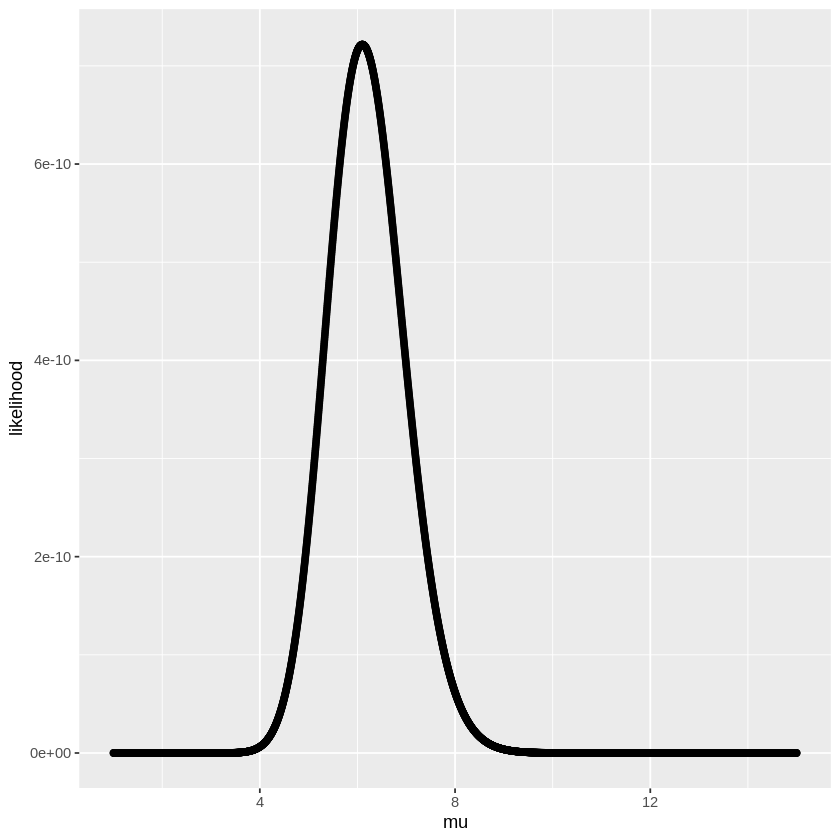

In [48]:
y = c(5, 8, 4, 6, 11, 6, 6, 5, 6, 4)
n.sample <- 4000
delta.mu <- (15-1)/n.sample
mu <- seq(from= 1, to=15, length.out = n.sample)

likelihood <- rep(1, times=n.sample)
for (l in y){
    likelihood <- likelihood * dpois(x=l, lambda = mu)
    }

ggplot() + geom_point(aes(mu, likelihood))

## a) Uniform prior

Mean,Median,Variance
<dbl>,<dbl>,<dbl>
6.2,2.644662e-05,39.06


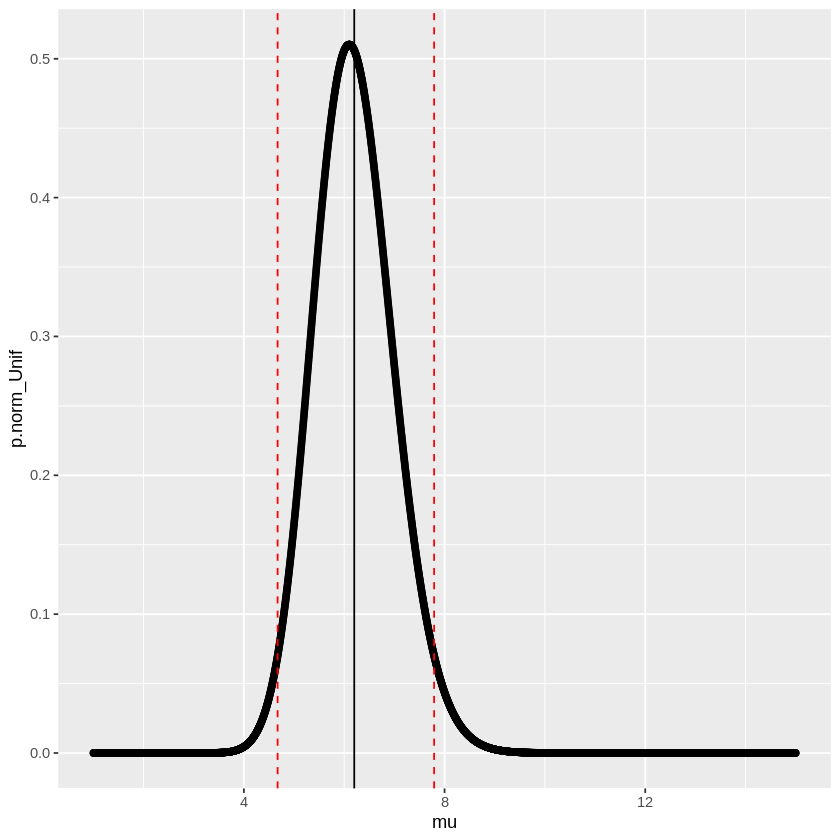

In [56]:
p.star_Unif <- likelihood * dunif(mu, min=1, max=15)
p.norm_Unif <- p.star_Unif / (delta.mu *sum(p.star_Unif))

#mean, variance, median
mean_Unif <- delta.mu * sum(mu*p.norm_Unif)
variance_Unif <- delta.mu * sum((mu**2)*p.norm_Unif) ## not sure
median_Unif <- median(p.norm_Unif)

Unif_result <- tibble(
                Mean = c(mean_Unif),
                Median = c(median_Unif),
                Variance = c(variance_Unif))
Unif_result

#95% credibiility interval
lower_bound_Unif <- ncredint(mu, p.norm_Unif, leve=0.95)[['lower']]
upper_bound_Unif <- ncredint(mu, p.norm_Unif, level=0.95)[['upper']]

#plot
plt_Unif <- ggplot() + geom_point(aes(mu,p.norm_Unif))
plt_Unif <- plt_Unif + geom_vline(aes(xintercept=mean_Unif))
plt_Unif <- plt_Unif + geom_vline(aes(xintercept=lower_bound_Unif), color='red', linetype='dashed')
plt_Unif <- plt_Unif + geom_vline(aes(xintercept=upper_bound_Unif), color='red', linetype='dashed')
plt_Unif

# b) Jeffreys' prior

In [ ]:
p.star_Jeffrey <- likelihood * (1/sqrt())